# Manipulación de la Base Era5

En este notebook, exploraremos la manipulación de la base de datos descargada desde la página [CDS Climate Data Store](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form). Dado que estamos trabajando con una base de datos en formato .nc, hemos decidido crear un notebook separado para abordar su procesamiento. La base de datos es del siguiente dataset de Era5 

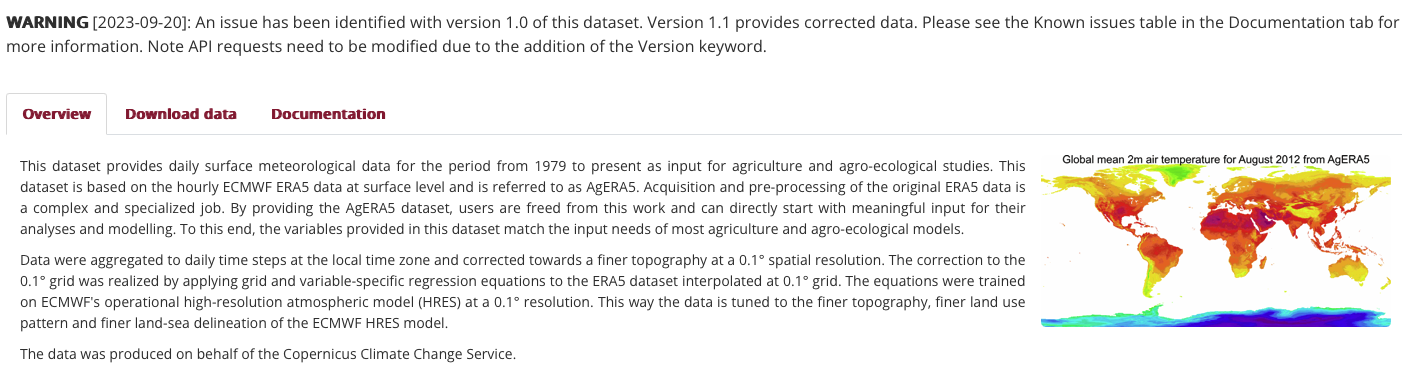

*Autor: Manrique Camacho P*

## Librerias Utilizadas

Seguidamente, se dara una breve introducción de las funciones de las librerias que se implementaron a lo largo del cuaderno. 

- **NumPy (np)**: Biblioteca fundamental para cálculos numéricos en Python. Proporciona arreglos multidimensionales y funciones para operar eficientemente en ellos.
- **xarray (xr)**: Ofrece estructuras de datos etiquetadas y dimensionadas para trabajar con datos multidimensionales, como los conjuntos de datos climáticos en formato NetCDF.
- **Pandas (pd)**: Utilizada para manipulación y análisis de datos. Proporciona estructuras de datos flexibles, como DataFrames, que son especialmente útiles para trabajar con datos tabulares.
- **Matplotlib.pyplot (plt)**: Biblioteca de visualización que permite crear gráficos estáticos, gráficos interactivos y visualizaciones 3D. Muy utilizada en la creación de gráficos y visualizaciones en entornos científicos y de análisis de datos.
- **os**: Permite manipular el entorno de la computadora y el cuaderno de ipynb.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os

## Creación de la Base de Datos y Graficación

En esta sección, se realiza la creación de una base de datos utilizando múltiples archivos NetCDF-4 ubicados en una carpeta específica. Este proceso implica cargar los datos de precipitación de cada archivo, aplanarlos y estructurarlos en un DataFrame de Pandas. 

1. Primero se inicia con la creación de una base de datos de prueba a partir de un subconjunto de archivos para comprobar la correcta ejecución del código y la validez de los datos.

In [13]:
# Load the netCDF-4 file
ds = xr.open_dataset('nc_files_wind/prueba.nc')

# Access precipitation data from the main dataset
wind_data_main = ds['Wind_Speed_10m_Mean']

# Get latitude, longitude, and precipitation values
latitude = wind_data_main['lat'].values
longitude = wind_data_main['lon'].values
time = wind_data_main['time'].values.flatten()

wind_values = wind_data_main.values.flatten()

# Create a Pandas DataFrame with appropriate reshaping
df = pd.DataFrame({
    'Time': np.repeat(time, len(wind_values)),
    'Latitude': np.tile(latitude, len(longitude)),
    'Longitude': np.repeat(longitude, len(latitude)),
    'Wind': wind_values
})

# Print the DataFrame
df

,Time,Latitude,Longitude,Wind
0,2016-07-01,32.7,-117.0,2.392052
1,2016-07-01,32.6,-117.0,2.142496
2,2016-07-01,32.5,-117.0,1.915614
3,2016-07-01,32.4,-117.0,1.830692
4,2016-07-01,32.3,-117.0,1.758265
...,...,...,...,...
101485,2016-07-01,7.7,-77.3,1.233215
101486,2016-07-01,7.6,-77.3,1.387742
101487,2016-07-01,7.5,-77.3,1.591442
101488,2016-07-01,7.4,-77.3,1.672195


2. Posteriormente a la creación de la base de datos de prueba, se realiza la graficación para observar que todo este en orden.

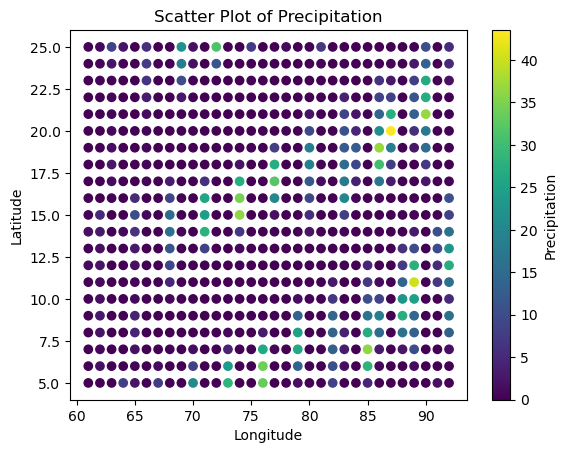

In [3]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Precipitation'], cmap='viridis')
plt.colorbar(label='Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Precipitation')
plt.show()

Ya observando que la base de prueba está correctamente importada y se le hizo el proceso de ETL correcto se prosigue con la base final en la cuál se siguieron los siguientes pasos:

1. **Iteración sobre Archivos:**
    1. Se itera sobre cada archivo NetCDF-4 en la carpeta especificada.
    2. Se carga el archivo y se accede a los datos de precipitación.
2. **Aplanamiento y Estructuración:**
    1. Se aplanan los datos de precipitación para facilitar su manipulación.
    2. Se crean DataFrames de Pandas con la estructura adecuada para cada archivo.
3. **Base de Datos de Prueba:**
    1. Se combinan todos los DataFrames individuales en una base de datos de prueba.
4. **Concatenación de los datos:**
    1. Se combina toda la información en un DataFrame final.

In [14]:
# Ruta de la carpeta que contiene los archivos NetCDF-4
folder_path = 'nc_files_wind/'

# Inicializar una lista para almacenar DataFrames individuales
dfs = []

# Iterar sobre los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(".nc"):  # Asegurarse de que estamos leyendo archivos NetCDF
        file_path = os.path.join(folder_path, filename)
        
        # Cargar el archivo NetCDF-4
        ds = xr.open_dataset(file_path)
        
        # Acceder a los datos de precipitación desde el conjunto de datos principal
        wind_data_main = ds['Wind_Speed_10m_Mean']

        #Obtener el tiempo
        time = wind_data_main['time'].values.flatten()#Para cambiar las dimensiones de la matriz
        
        # Obtener valores de latitud, longitud y precipitación
        latitude = wind_data_main['lat'].values
        longitude = wind_data_main['lon'].values
        

        # Aplanar los valores de precipitación
        wind_values = wind_data_main.values.flatten()

        # Crear un DataFrame de Pandas con la remodelación adecuada
        df = pd.DataFrame({
            'Time': np.repeat(time, len(wind_values)),
            'Latitude': np.tile(latitude, len(longitude)),
            'Longitude': np.repeat(longitude, len(latitude)),
            'Precipitation': wind_values
        })

        # Agregar el DataFrame a la lista
        dfs.append(df)
        
        ds.close()

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Imprimir el DataFrame final
df

,Time,Latitude,Longitude,Precipitation
0,2020-08-10,32.7,-117.0,2.560396
1,2020-08-10,32.6,-117.0,2.291965
2,2020-08-10,32.5,-117.0,1.822819
3,2020-08-10,32.4,-117.0,1.788026
4,2020-08-10,32.3,-117.0,1.805942
...,...,...,...,...
407786815,2014-12-15,7.7,-77.3,1.103699
407786816,2014-12-15,7.6,-77.3,1.132305
407786817,2014-12-15,7.5,-77.3,1.274527
407786818,2014-12-15,7.4,-77.3,0.950753


In [ ]:
df.to_csv("wind.csv")

**Nota Importante:**

Debido al considerable tamaño del archivo CSV que contiene la base de datos de precipitación, no es posible cargarlo directamente en este repositorio de GitHub. GitHub tiene limitaciones en el tamaño de los archivos que se pueden almacenar.

No obstante, este cuaderno está diseñado para trabajar con la información de precipitación disponible localmente. Si alguien necesita acceso al archivo CSV completo o tiene alguna pregunta específica sobre los datos, puede contactar al autor directamente.

Se agradece la comprensión y el autor está disponible para ayudar en cualquier consulta o colaboración que pueda surgir.

**Fecha: 24 de Noviembre de 2023**